Initial Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB
None
------------------------------


/var/folders/15/xdt89ydd6g75p5gc7lt4fc6h0000gn/T/ipykernel_8630/1809959558.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


Cleaned Data Snapshot:
  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   

          City  Total Sales  
0       Dallas        23.90  
2       Boston        99.99  
3  Los Angeles       600.00  
4  

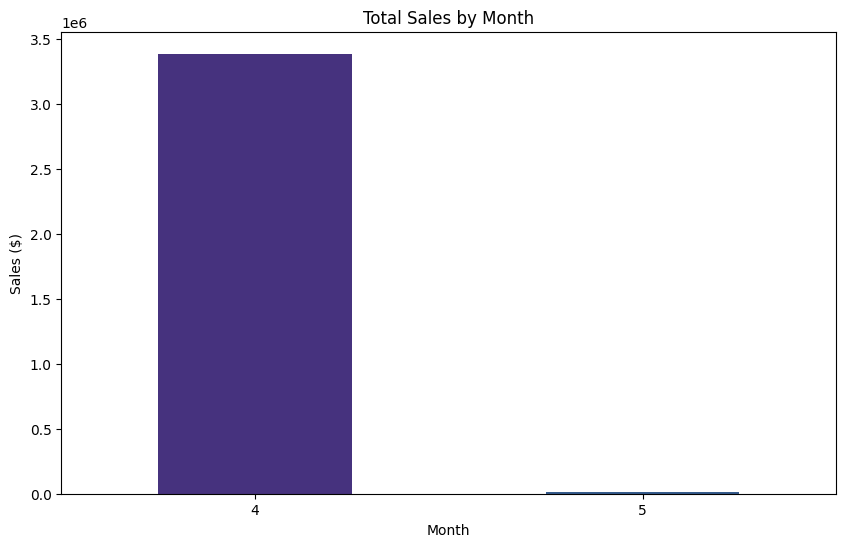

/var/folders/15/xdt89ydd6g75p5gc7lt4fc6h0000gn/T/ipykernel_8630/1809959558.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette='plasma')


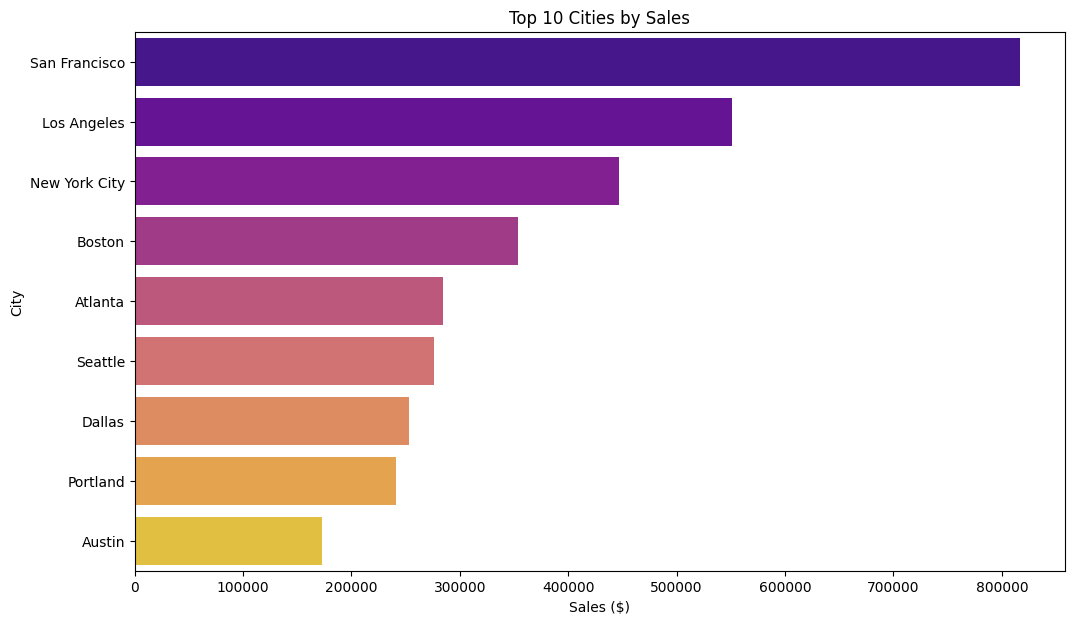


Top 5 Product Combinations Sold Together:
[(('Google Phone', 'USB-C Charging Cable'), 106), (('iPhone', 'Lightning Charging Cable'), 106), (('iPhone', 'Wired Headphones'), 43), (('Google Phone', 'Wired Headphones'), 41), (('iPhone', 'Apple Airpods Headphones'), 37)]
------------------------------

Cleaned data saved to 'processed_sales.csv' for Tableau.


In [5]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Loading and Cleaning ---

# Load the dataset. Make sure the CSV file is in the same directory as this notebook.
file_path = 'sales_data.csv'
df = pd.read_csv(file_path)

# Display initial info to inspect data types and missing values
print("Initial Data Information:")
print(df.info())
print("-" * 30)

# Convert 'Order Date' to a datetime object, handling potential errors and mixed formats
# We use errors='coerce' to turn unparseable dates into NaT (Not a Time)
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Drop any rows where 'Order Date' could not be parsed
df.dropna(subset=['Order Date'], inplace=True)

# Convert 'Quantity Ordered' and 'Price Each' to numeric, handling potential errors
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# Drop rows with NaN values in these columns
df.dropna(subset=['Quantity Ordered', 'Price Each'], inplace=True)

# Extract month and city for analysis
df['Month'] = df['Order Date'].dt.month
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

# Calculate total sales for each row
df['Total Sales'] = df['Quantity Ordered'] * df['Price Each']

print("Cleaned Data Snapshot:")
print(df.head())

# --- Data Visualization and Analysis ---

# 1. Plotting Total Sales by Month
monthly_sales = df.groupby('Month')['Total Sales'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color=sns.color_palette("viridis"))
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=0)
plt.show()

# 2. Plotting Sales by City
city_sales = df.groupby('City')['Total Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=city_sales.values, y=city_sales.index, palette='plasma')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Sales ($)')
plt.ylabel('City')
plt.show()

# 3. Finding Products Most Often Sold Together
from itertools import combinations
from collections import Counter

# Identify orders with multiple products
df_multiple_items = df[df['Order ID'].duplicated(keep=False)]
grouped_products = df_multiple_items.groupby('Order ID')['Product'].apply(list)

# Find common product combinations
count = Counter()
for sublist in grouped_products:
    for pair in combinations(sublist, 2):
        count[pair] += 1

print("\nTop 5 Product Combinations Sold Together:")
print(count.most_common(5))
print("-" * 30)

# Save the processed data to a new CSV for Tableau
df.to_csv('processed_sales.csv', index=False)
print("\nCleaned data saved to 'processed_sales.csv' for Tableau.")
